# Pizza classifier

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
classes = ['capricciosa', 'diavola']
from pathlib import Path
path = Path('data')
pathd = {path/c for c in classes}

In [4]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

capricciosa


diavola


In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)

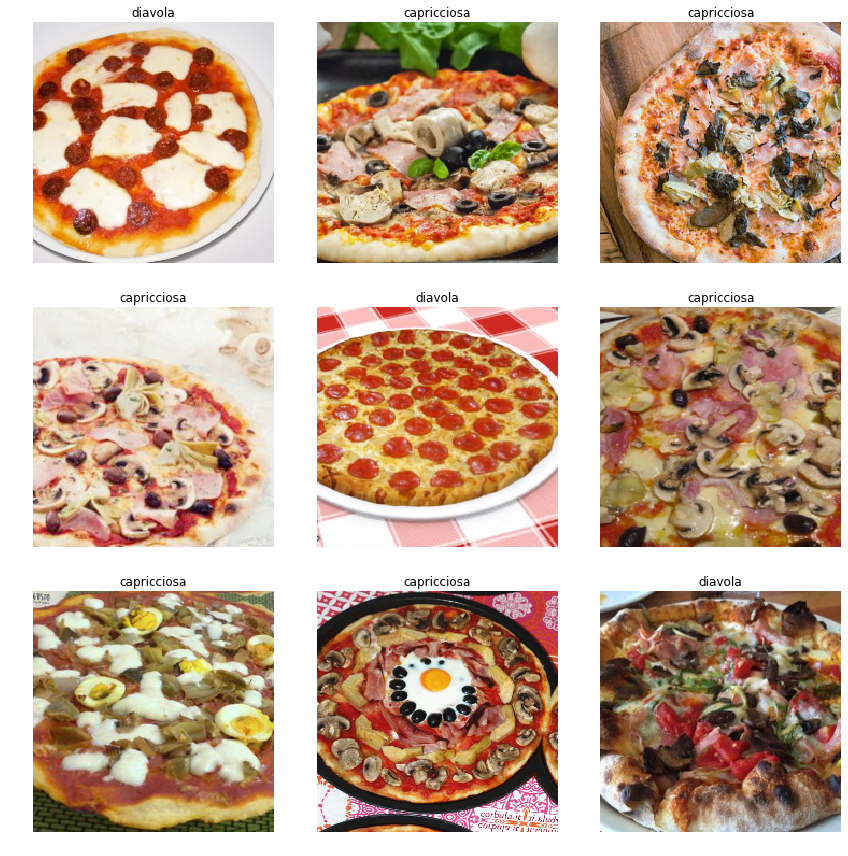

In [6]:
data.show_batch(rows=3)

In [7]:
data.classes, data.c

(['capricciosa', 'diavola'], 2)

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.906056,0.821013,0.368421,00:02
1,0.744298,0.516016,0.263158,00:01
2,0.674073,0.512319,0.263158,00:01
3,0.575217,0.550153,0.368421,00:01


In [10]:
learn.save('stage-1')

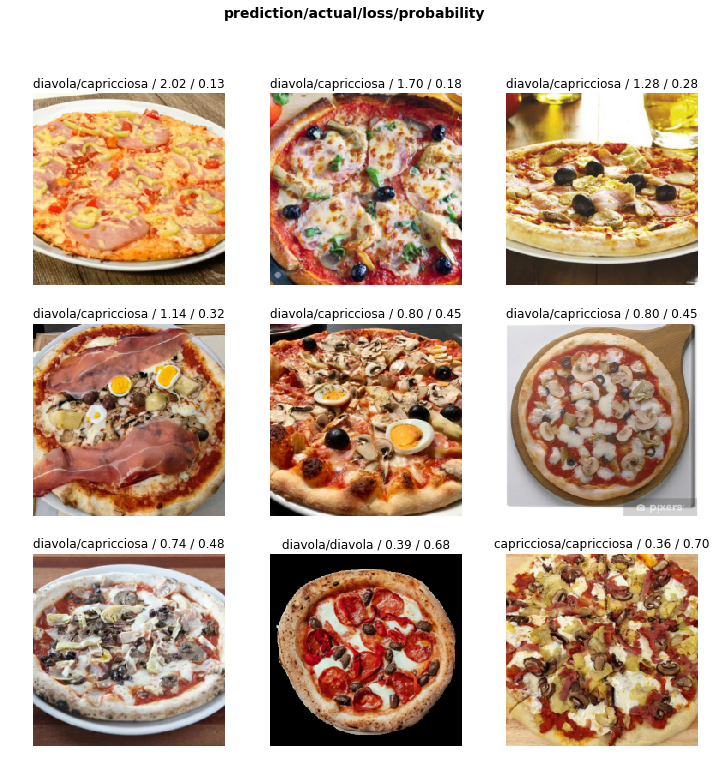

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, heatmap=False)

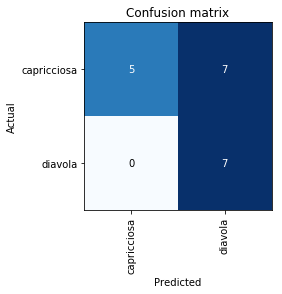

In [12]:
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


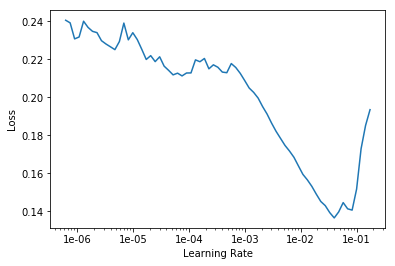

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.171942,0.522538,0.263158,00:01
1,0.184921,0.448616,0.157895,00:01
2,0.189641,0.405998,0.157895,00:01
3,0.152915,0.386618,0.105263,00:01
4,0.159642,0.381794,0.105263,00:01
5,0.147575,0.383999,0.105263,00:01
6,0.140936,0.377527,0.105263,00:01
7,0.130526,0.379154,0.105263,00:01


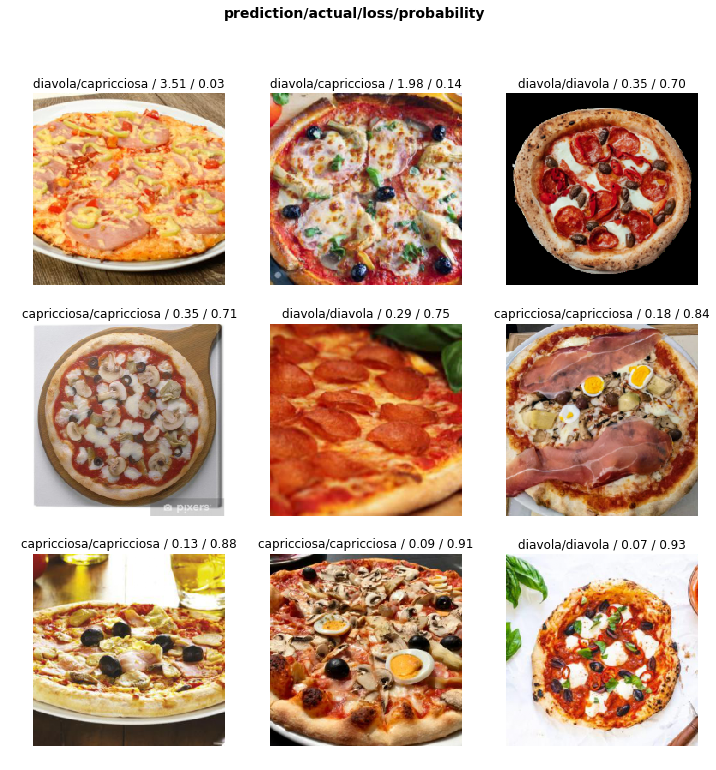

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, heatmap=False)

In [16]:
learn.save('stage-2')